In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import os

In [4]:
all_files = sorted(os.listdir('/data/rl/madrona_3d_example/data_dump/'))

In [5]:
all_files

['ppo_2023-10-01 13:20:46.156877.pt',
 'ppo_2023-10-01 13:21:03.882364.pt',
 'ppo_2023-10-01 13:21:44.553469.pt',
 'ppo_2023-10-01 13:22:26.817927.pt',
 'ppo_2023-10-01 13:23:43.838319.pt',
 'ppo_2023-10-01 13:26:19.351159.pt',
 'ppo_2023-10-01 13:26:52.493146.pt',
 'ppo_2023-10-01 13:28:21.258109.pt',
 'ppo_2023-10-01 13:29:46.532583.pt',
 'ppo_2023-10-01 13:29:57.123621.pt',
 'ppo_2023-10-01 13:29:58.676967.pt',
 'ppo_2023-10-01 13:31:02.798894.pt',
 'ppo_2023-10-01 13:31:39.290810.pt',
 'ppo_2023-10-01 13:31:42.862135.pt',
 'ppo_2023-10-01 13:32:33.571168.pt',
 'ppo_2023-10-01 13:33:28.684075.pt',
 'ppo_2023-10-01 13:34:33.034092.pt',
 'ppo_2023-10-01 13:35:42.214110.pt',
 'ppo_2023-10-01 13:36:05.762752.pt',
 'ppo_2023-10-01 13:36:07.347439.pt',
 'ppo_2023-10-01 13:36:46.945271.pt',
 'ppo_2023-10-01 13:37:16.261890.pt',
 'ppo_2023-10-01 13:37:38.454409.pt',
 'ppo_2023-10-01 13:38:19.453985.pt',
 'ppo_2023-10-01 13:38:32.072335.pt',
 'ppo_2023-10-01 13:39:24.797564.pt',
 'ppo_2023-1

In [6]:
root_path = '/data/rl/madrona_3d_example/data_dump/'
all_rollouts = []
for file in all_files:
    all_rollouts.append(torch.load(root_path + file))

Top-level structure
obs_tensors = [
        self_obs_tensor.view(batch_size, *self_obs_tensor.shape[2:]),
        partner_obs_tensor.view(batch_size, *partner_obs_tensor.shape[2:]),
        room_ent_obs_tensor.view(batch_size, *room_ent_obs_tensor.shape[2:]),
        door_obs_tensor.view(batch_size, *door_obs_tensor.shape[2:]),
        lidar_tensor.view(batch_size, *lidar_tensor.shape[2:]),
        steps_remaining_tensor.view(batch_size, *steps_remaining_tensor.shape[2:]),
        id_tensor,
    ]


In [7]:
len(all_rollouts[-1].obs) # 

7

In [18]:
all_rollouts[-1].obs[0].shape # 8, 5, 16384, 8: 8 bptt chunks, 5 steps per bptt chunk, 16384 environments, 8 SelfObs

torch.Size([8, 5, 16384, 8])

In [9]:
print(all_rollouts[-1].obs[0][:,0,0,2:5])

tensor([[ 5.0930e-02,  2.6403e-01,  0.0000e+00],
        [ 5.0641e-02,  3.4325e-01,  0.0000e+00],
        [ 2.1636e-02,  3.7823e-01,  0.0000e+00],
        [-3.0726e-02,  4.1513e-01,  0.0000e+00],
        [-7.3967e-02,  4.7430e-01,  0.0000e+00],
        [-8.4196e-02,  5.3049e-01,  0.0000e+00],
        [-1.1079e-01,  5.3088e-01,  4.8847e-05],
        [-1.3063e-01,  5.3559e-01,  0.0000e+00]], device='cuda:0')


In [10]:
print(all_rollouts[-1].obs[0][:,0,4,2:5])

tensor([[0.0377, 0.2632, 0.0000],
        [0.0438, 0.3015, 0.0000],
        [0.0579, 0.3348, 0.0000],
        [0.0677, 0.4084, 0.0000],
        [0.0695, 0.4688, 0.0000],
        [0.0440, 0.5138, 0.0000],
        [0.0337, 0.5410, 0.0000],
        [0.0364, 0.5130, 0.0000]], device='cuda:0')


## Try plotting this

In [11]:
import matplotlib.pyplot as plt

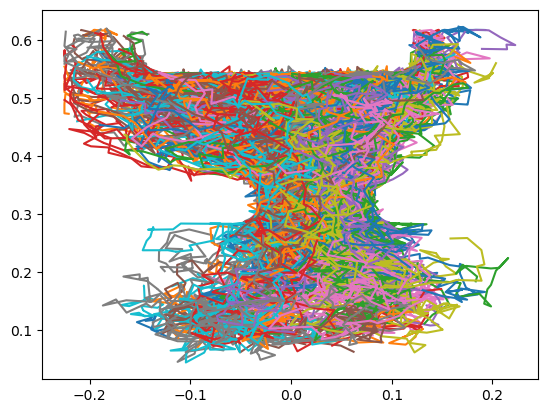

In [12]:
for i in range(1000):
    plt.plot(all_rollouts[-1].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-1].obs[0][:,:,i,3].cpu().reshape(-1))

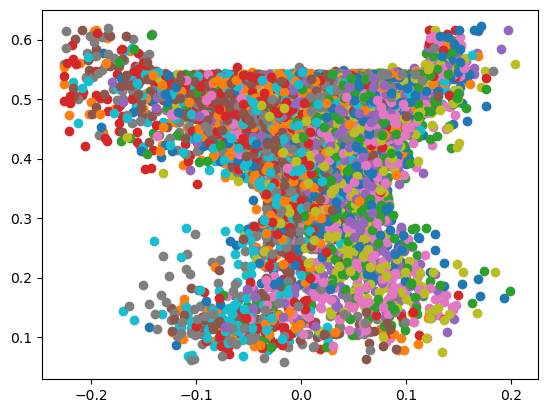

In [13]:
for i in range(1000):
    plt.scatter(all_rollouts[-1].obs[0][:,4,i,2].cpu(), all_rollouts[-1].obs[0][:,4,i,3].cpu())

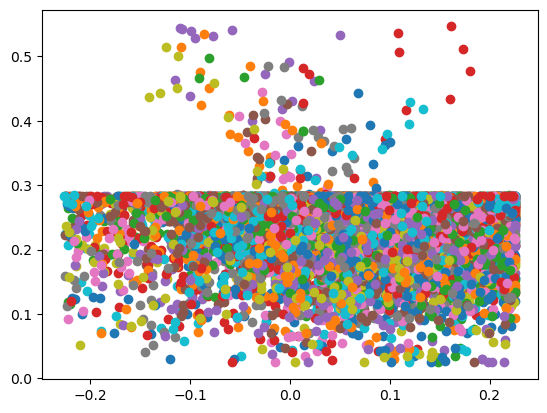

In [14]:
for i in range(1000):
    plt.scatter(all_rollouts[0].obs[0][:,4,i,2].cpu(), all_rollouts[0].obs[0][:,4,i,3].cpu())

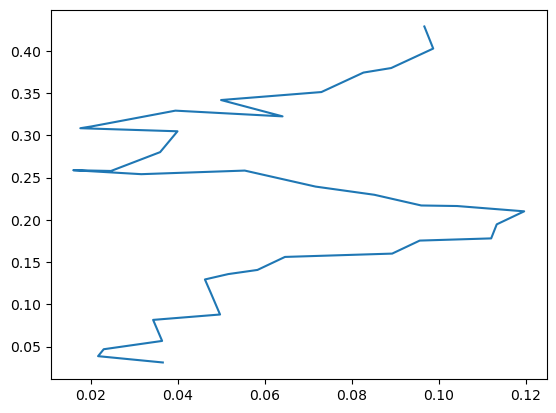

In [15]:
for i in range(1):
    plt.plot(all_rollouts[-3].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-3].obs[0][:,:,i,3].cpu().reshape(-1))
    #plt.plot(all_rollouts[-2].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-2].obs[0][:,:,i,3].cpu().reshape(-1))
    #plt.plot(all_rollouts[-1].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[-1].obs[0][:,:,i,3].cpu().reshape(-1))

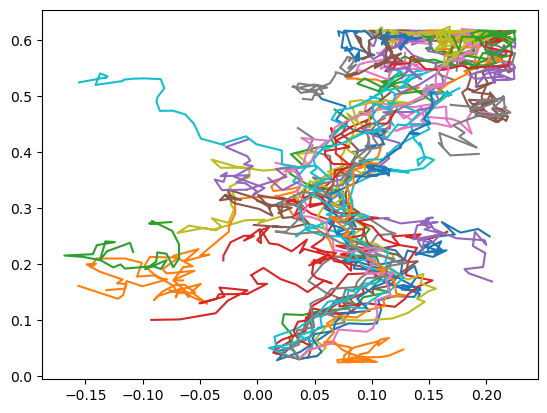

In [17]:
for i in range(1):
    for j in range(len(all_rollouts)):
        plt.plot(all_rollouts[j].obs[0][:,:,i,2].cpu().reshape(-1), all_rollouts[j].obs[0][:,:,i,3].cpu().reshape(-1))

## Try out a heatmap

In [30]:
test_data = all_rollouts[-1].obs[0][:,0,0,2:4].cpu()

In [31]:
test_data = torch.round(test_data*100)

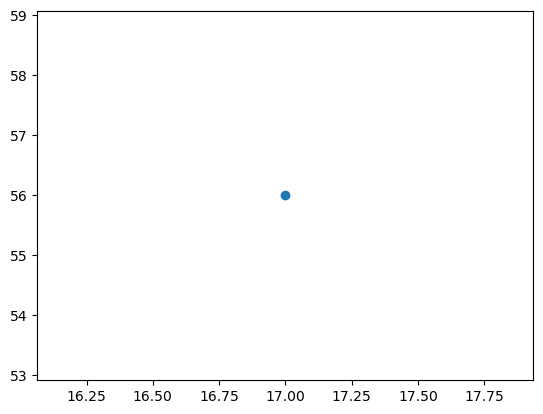

In [32]:
plt.scatter(test_data[:,0],test_data[:,1])

In [33]:
x_data = torch.round(all_rollouts[-1].obs[0][:,:,:,2].cpu().flatten()*100)

In [34]:
y_data = torch.round(all_rollouts[-1].obs[0][:,:,:,3].cpu().flatten()*100)

In [35]:
positions, counts = torch.unique(torch.stack([x_data,y_data]),dim=-1,return_counts=True)

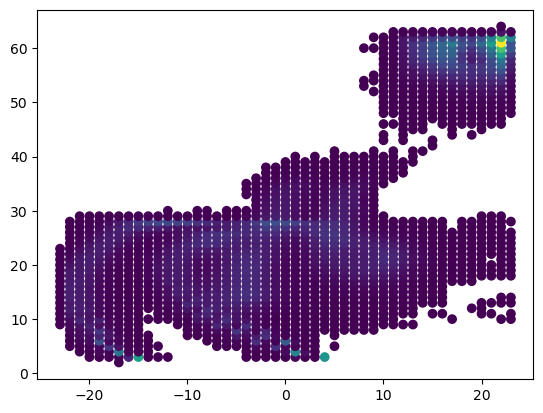

In [36]:
plt.scatter(positions[0], positions[1], c = counts)

In [37]:
x_data = torch.round(all_rollouts[-1].obs[0][:,:,:,2].cpu().flatten()*100)

In [38]:
y_data = torch.round(all_rollouts[-1].obs[0][:,:,:,3].cpu().flatten()*50)

In [39]:
positions, counts = torch.unique(torch.stack([x_data,y_data]),dim=-1,return_counts=True)

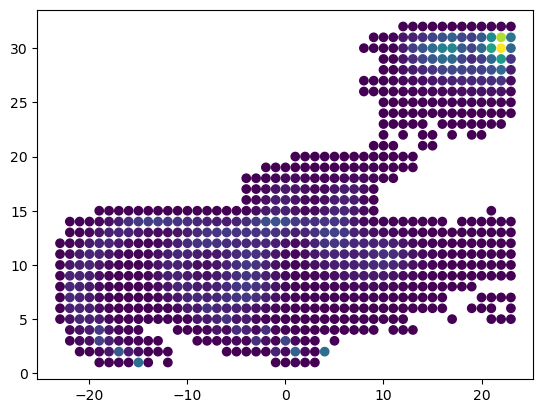

In [40]:
plt.scatter(positions[0], positions[1], c = counts)

# Understand other positions in the state

In [40]:
all_rollouts[-1].obs[0].shape # Self obs

torch.Size([8, 5, 16384, 8])

In [41]:
all_rollouts[-1].obs[1].shape # Partner obs: polar direction of partner [0,1], boolean of whether or not the partner is grabbing block [2]

torch.Size([8, 5, 16384, 1, 3])

In [42]:
all_rollouts[-1].obs[2].shape # Room ent obs: a list of objects, with polar direction of partner [0,1] and enum of object type [2]

torch.Size([8, 5, 16384, 6, 3])

In [44]:
all_rollouts[-1].obs[3].shape # Door obs: polar direction of door [0,1], boolean of whether or not the door is open

torch.Size([8, 5, 16384, 3])

In [46]:
all_rollouts[-1].obs[4].shape # Lidar

torch.Size([8, 5, 16384, 30, 2])

In [45]:
all_rollouts[-1].obs[3][0,:,0,:]

tensor([[ 0.1895, -0.7832,  0.0000],
        [ 0.1866, -0.7455,  0.0000],
        [ 0.1948, -0.7251,  0.0000],
        [ 0.2060, -0.7401,  0.0000],
        [ 0.1916, -0.6551,  0.0000]], device='cuda:0')